# Section 3. Hypothesis Testing

### CONTENTS

* <a href='02- DSC 2022 Exploratory Data Analysis.ipynb#top'>**Section 2. Exploratory Data Analysis**</a> 
* <a href='03 - DSC 2022 Hypothesis testing.ipynb#top'>**Section 3. Hypothesis Testing**</a> 
  * [1. T-test](#t)
  * [2. ANOVA](#anova)
* <a href='04- DSC 2022 Feature Engineering .ipynb#top'>**Section 4. Feature Engineering**</a> 

Recall that in section 1, we listed out several hypothesis that we would like to test out. In this section, we will focus on how to use statistical methods to do so. 

For hypothesis testing  the first step is always to state clearly a null hypothesis and its alternative hypothesis. The rationale is that if we assumed that the null hypothesis is true, how likely we are to see the data we currently observe, the probability is called p-value. If such p-value is extremely small, then we have some confidence such that our initial null hypothesis is False. Or put it into a more statistical way, we reject the null hypothesis with xx confidendece. 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cmg = pd.read_excel('cmg.xlsx' ,index_col = 'offeringId')
cmg.head(5)

,offeringPricingDate,offeringsType,offeringsSector,offeringsSubSector,offeringsDiscountToLastTrade,filingDetailsOfferingPrice,issuerCusip,issuerName,-15SharePrice,-14SharePrice,...,-1SharePrice,underwriters,offeringTotalBookrunners,leftLeadFirmId,leftLeadFirmName,1SharePrice,7SharePrice,30SharePrice,90SharePrice,180SharePrice
offeringId,,,,,,,,,,,,,,,,,,,,,
b969a1c8-0a26-438a-81e6-5e95f3b30501,2003-10-02,IPO,Consumer Cyclical,Vehicles & Parts,0.0,13.0,501889208,BharCap Acquisition Corp.,NaN,NaN,...,NaN,[{'firmId': '15af8b8d-c949-4fa0-b35e-a6482d3ca...,2,759ce574-3755-480b-8b83-c614f4568db1,Baird,1.875000,1.950000,2.188750,2.268750,2.125000
1081394b-c9f2-4479-8dd2-528027ff1eea,2005-07-21,IPO,Communication Services,Telecom Services,0.0,13.0,209034107,GrandSouth Bancorporation,NaN,NaN,...,NaN,[{'firmId': 'dac135c0-9e99-4362-9762-7179a0023...,2,5eb63e75-8f95-464e-86fe-3222865c54ef,Credit Suisse,13.790000,14.780000,13.540000,12.760000,12.780000
714a166d-9eb0-4b3c-ab8e-7c0dc6f21ee0,2005-08-04,IPO,Communication Services,Internet Content & Information,0.0,27.0,056752108,Brand Velocity Acquisition Corp,NaN,NaN,...,NaN,[{'firmId': 'a82a866c-d40e-453a-99e1-8acb44efb...,2,dac135c0-9e99-4362-9762-7179a0023c9e,Goldman Sachs & Co.,12.254000,9.790000,7.780000,6.850000,5.451000
43f06950-8d20-4cfc-b16d-237e0927e1e6,2005-11-10,IPO,Industrials,Consulting Services,0.0,16.0,G47567105,ProLung Inc.,NaN,NaN,...,NaN,[{'firmId': 'a82a866c-d40e-453a-99e1-8acb44efb...,2,cd9cd378-73b5-4cef-8666-ad2c5149ccd8,Goldman Sachs & Co.,4.807962,4.841702,5.075071,6.942023,7.796772
96a13598-121a-41c0-83b5-448843cd8709,2006-02-03,IPO,Energy,Oil & Gas Midstream,0.0,21.0,29273V100,Golden Star Acquisition Corp,NaN,NaN,...,NaN,[{'firmId': '7d932034-3e85-46ab-97b4-b6e8e86ee...,3,8fdb6c2d-3b35-40d4-a886-0a3461b42d98,UBS Investment Bank,5.662500,5.487500,5.447500,6.225000,6.550000


<a id='t'></a>
## 1. T-test

Hypothesis: if a deal was made at a discount, then the deal would likely to have worse performance in the future. 

The key assumption of a t-test is that under each one of the two levels, the data is noramlly distributed(Gaussian) . Be sure to always check the underlying assumptions before performing any analysis.

According to the boxplot, we observe that for both discount and no-discount group, the distribution of one-day performance is normally distributed. 

<AxesSubplot:xlabel='discount', ylabel='180SharePrice'>

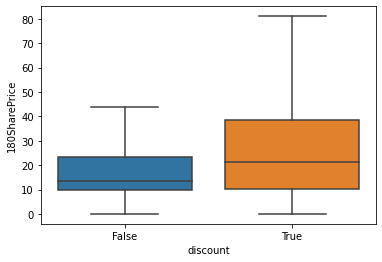

In [5]:
cmg['discount'] = cmg['offeringsDiscountToLastTrade']<0
sns.boxplot(x="discount", y="180SharePrice", data=cmg,showfliers = False)

<a id='anova'></a>
## 2. One Way - Analysis of Variance (ANOVA)

What happens when we have more than two categories for our explanatory variable? Then a t-test would not be enough. In this part, we introduce one way analysis of varaince(one-way ANOVA).

Prior to the hypothesis testing, let's agian first check if the assumption of ANOVA is satisfied. 

In [6]:
temp = cmg.groupby(by = 'offeringsSector')['180SharePrice'].agg(['count', 'mean', 'median', 'var']).reset_index()
temp

,offeringsSector,count,mean,median,var
0,Basic Materials,236,26.706637,14.895,1691.767703
1,Communication Services,336,41.666802,16.430,16499.334016
2,Consumer Cyclical,688,33.631770,20.750,2343.978188
3,Consumer Defensive,282,28.367036,20.810,1165.029518
4,Energy,704,35.057314,24.130,5568.920524
5,Financial Services,1286,23.845112,12.270,1426.662525
6,Healthcare,2301,32.309370,15.020,7739.495303
7,Industrials,680,29.927585,17.765,5496.606006
8,Real Estate,788,33.031774,19.765,2341.923000
9,Technology,1037,34.721705,19.690,5555.365850


<AxesSubplot:xlabel='offeringsSector', ylabel='180SharePrice'>

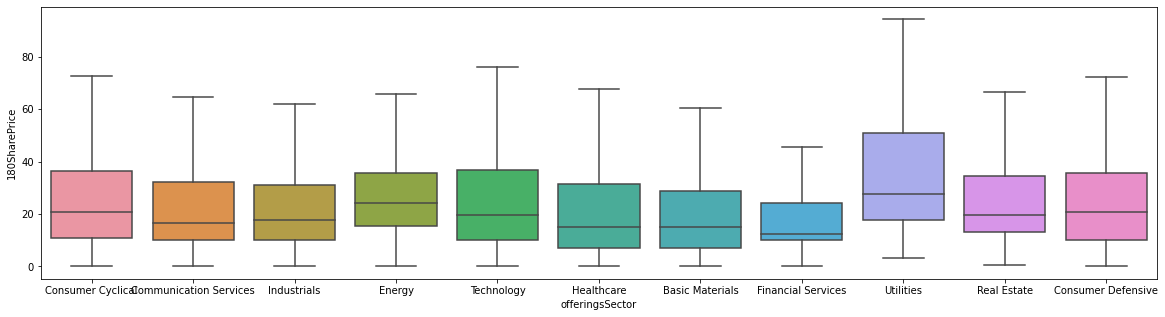

In [8]:
plt.figure(figsize = (20, 5))
sns.boxplot(x = 'offeringsSector', y = '180SharePrice', data = cmg, showfliers = False)

Since the p-value is extremely small(almost 0), which is clearly smaller than our preset cofidence level threshold(alpha = 0.05). Then we shall reject the null hypothesis and claim that sector matters. 

In [10]:
from scipy.stats import f_oneway
performanceBySector = cmg.filter(items = ["offeringsSector","180SharePrice"]).pivot(columns = "offeringsSector", values = "180SharePrice")

In [11]:
F, p = f_oneway(
                performanceBySector['Communication Services'].dropna(),
                performanceBySector['Consumer Cyclical'].dropna(),
                performanceBySector['Consumer Defensive'].dropna(), 
                performanceBySector['Energy'].dropna(), 
                performanceBySector['Financial Services'].dropna(),
                performanceBySector['Healthcare'].dropna(),
                performanceBySector['Industrials'].dropna(),
                performanceBySector['Real Estate'].dropna(),
                performanceBySector['Technology'].dropna(),
                performanceBySector['Utilities'].dropna())
print('F-Statistic=%.3f, p=%.3f' % (F, p))

F-Statistic=3.097, p=0.001


If you are intersted in more in-depth explanations, check out  
https://www.stat.cmu.edu/~hseltman/309/Book/chapter7.pdf for one-way ANOVA
https://www.stat.cmu.edu/~hseltman/309/Book/chapter11.pdf for two-way ANOVA.